In [1]:
# import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# import dataset 
dataset = pd.read_csv("C:/Users/Fitria Nur Rahmadani/Downloads/Student_Performance (1).csv")
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# mengubah value pada kolom atau variabel 'Extracurricular Activities'
dataset['Extracurricular Activities'] = dataset['Extracurricular Activities'].replace({'Yes' : 1, 'No' : 0})
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [4]:
# mengubah tipe data kolom atau variabel 'Performance Index'
dataset['Performance Index'] = dataset['Performance Index'].astype('int')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int32
dtypes: int32(1), int64(5)
memory usage: 429.8 KB


In [6]:
dataset.shape # sebelum drop duplicate

(10000, 6)

In [7]:
data = dataset.drop_duplicates()
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [8]:
data.shape # setelah drop duplicate

(9873, 6)

In [9]:
data['Hours Studied'].sort_values().unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [10]:
data['Previous Scores'].sort_values().unique()

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [11]:
data['Extracurricular Activities'].unique()

array([1, 0], dtype=int64)

In [12]:
data['Sleep Hours'].sort_values().unique()

array([4, 5, 6, 7, 8, 9], dtype=int64)

In [13]:
data['Sample Question Papers Practiced'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [14]:
data['Performance Index'].sort_values().unique()

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

## a. Transformasi data dan integrasi data

In [15]:
#deteksi missing value 
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [16]:
# deteksi outlier
# Menghitung kuartil
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan outlier
outliers = data[(data < lower_bound) | (data > upper_bound)].dropna()

# Menghitung jumlah outlier
print("Jumlah Outlier :", len(outliers))

Jumlah Outlier : 0


## b. Statistik deskriptif

In [17]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


#### - Distribusi Uniform

Nilai rata-rata dari data tersebut adalah: 55.2167
Nilai standar deviasi dari data tersebut adalah: 19.2076
Nilai a dari data tersebut adalah: 21.9481
Nilai b dari data tersebut adalah: 88.4852
Nilai a + b dari data tersebut adalah: 110.4333
Nilai b - a dari data tersebut adalah: 66.5371


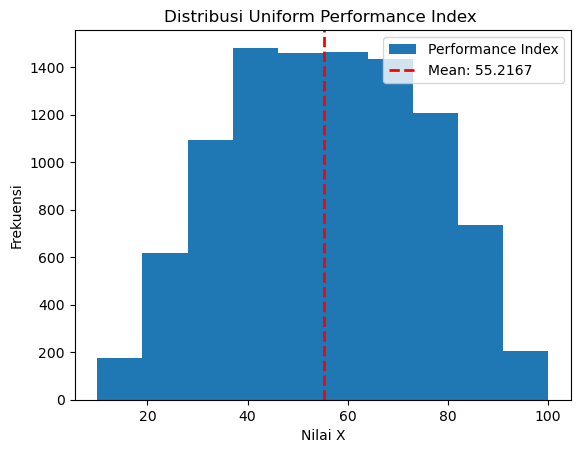

In [18]:
# Mencari nilai mean
mean = sum(data["Performance Index"]) / len(data["Performance Index"])

# Mencari nilai a+b
a_plus_b = 2 * mean

# Mencari nilai standar deviasi 
var = sum([((x - mean) ** 2) for x in data["Performance Index"]]) / len(data["Performance Index"])
std = var ** 0.5

# Mencari nilai b-a
b_min_a = (12 ** 0.5) * std

# Mencari nilai a dan b
a = (a_plus_b - b_min_a) / 2
b = (a_plus_b + b_min_a) / 2

# menampilkan keseluruhan nilai 
print(f"Nilai rata-rata dari data tersebut adalah: {mean:.4f}")
print(f"Nilai standar deviasi dari data tersebut adalah: {std:.4f}")
print(f"Nilai a dari data tersebut adalah: {a:.4f}")
print(f"Nilai b dari data tersebut adalah: {b:.4f}")
print(f"Nilai a + b dari data tersebut adalah: {a_plus_b:.4f}")
print(f"Nilai b - a dari data tersebut adalah: {b_min_a:.4f}")

# Visualisasikan dataset menggunakan histogram
data["Performance Index"].plot.hist()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.4f}')
plt.title('Distribusi Uniform Performance Index ')
plt.xlabel('Nilai X')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [19]:
# Menghitung probabilitas distribusi uniform berdasarkan nilai a dan b yang sudah didapatkan 
a = 21.9481
b = 88.4852
x = 55

if x > a and x < b:
    probabilitas = (x - a) / (b - a)
    persentase = probabilitas * 100
    print(f"Probabilitas P(X < {x}) pada interval ({a}, {b}) adalah : {probabilitas:.3f} atau {persentase:.2f}%")
else:
    print(f"Nilai {x} berada di luar interval ({a}, {b})")

Probabilitas P(X < 55) pada interval (21.9481, 88.4852) adalah : 0.497 atau 49.67%


#### - Distribusi Normal

In [20]:
# Mencari nilai mean
mean = sum(data["Performance Index"]) / len(data["Performance Index"])

# Mencari nilai standar deviasi 
var = sum([((x - mean) ** 2) for x in data["Performance Index"]]) / len(data["Performance Index"])
std = var ** 0.5

# Mencari nilai f(x) menggunakan rumus distribusi normal
std_sqrt = std * std
fx = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((data["Performance Index"]- mean) / std) ** 2)
result=pd.DataFrame({'x':data["Performance Index"],'f(x)':fx})
result = result.sort_values(by='x')
result.head()

,x,f(x)
332,10,0.001300
3236,11,0.001468
5322,11,0.001468
6501,11,0.001468
1147,11,0.001468


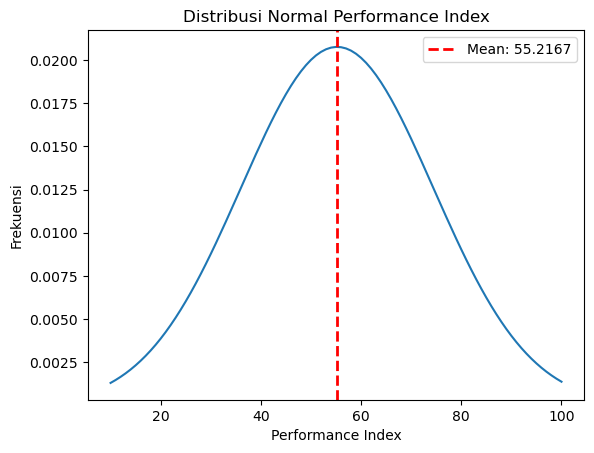

In [21]:
# Visualisasikan antara nilai x dan f(x) menggunakan diagram garis 
plt.plot(result['x'],result['f(x)'])
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.4f}')
plt.title('Distribusi Normal Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

#### - Skewness

In [22]:
def cari_modus(data_column):
    # Menghitung frekuensi setiap elemen dalam kolom 'Performance Index'
    frekuensi = data_column.value_counts()

    # Mengambil nilai dengan frekuensi tertinggi (modus)
    nilai_modus = frekuensi.idxmax()
    frekuensi_modus = frekuensi.max()
    return nilai_modus, frekuensi_modus

Nilai modus dari data tersebut adalah 67 yang muncul sebanyak 182 kali
Nilai rata-rata dari data tersebut adalah 55.2166514737162
Nilai tengah atau median dari data tersebut adalah 55
Nilai standar deviasi dari data tersebut adalah 19.2076
Nilai skewness dari data tersebut adalah 0.0338


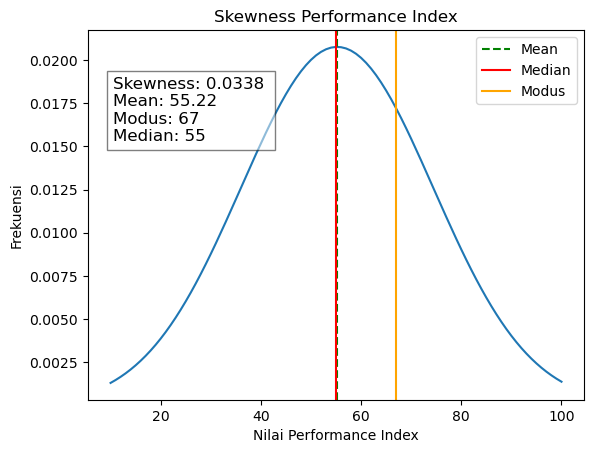

In [23]:
# mencari nilai modus 
nilai_modus, frekuensi_modus = cari_modus(data['Performance Index'])

# Mencari nilai mean 
mean_val = sum(data['Performance Index']) / len(data['Performance Index'])

# Mengurutkan data dalam kolom tersebut
sorted_data = data['Performance Index'].sort_values().tolist()

# Menghitung jumlah data
n = len(sorted_data)

# Mencari median
if n % 2 == 1:
    # Jika jumlah data ganjil
    median = sorted_data[n // 2]
else:
    # Jika jumlah data genap
    middle1 = sorted_data[(n - 1) // 2]
    middle2 = sorted_data[(n + 1) // 2]
    median = (middle1 + middle2) / 2

# Hitung jumlah kuadrat selisih antara setiap data dengan rata-rata
squared_diff = [(x - mean_val) ** 2 for x in (data['Performance Index'])]

# Hitung rata-rata dari kuadrat selisih di atas
variance = sum(squared_diff) / len(data['Performance Index'])

# Hitung standar deviasi dengan mengambil akar kuadrat dari varians
std_val = variance ** 0.5

# Menghitung nilai skewness 
skewness=3*(mean_val-median)/std_val

# Visualisasi histogram data sebagai garis
plt.plot(result['x'],result['f(x)'])
plt.axvline(mean_val, color='green',linestyle='--', label='Mean')
plt.axvline(median, color='red', label='Median')
plt.axvline(nilai_modus, color='orange', label='Modus')
plt.text(0.05, 0.7, f'Skewness: {skewness:.4f} \nMean: {mean:.2f} \nModus: {nilai_modus} \nMedian: {median}', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)
plt.xlabel('Nilai Performance Index')
plt.ylabel('Frekuensi')
plt.title('Skewness Performance Index') 
plt.legend()

print(f"Nilai modus dari data tersebut adalah {nilai_modus} yang muncul sebanyak {frekuensi_modus} kali")
print(f"Nilai rata-rata dari data tersebut adalah {mean_val}")
print(f"Nilai tengah atau median dari data tersebut adalah {median}")
print(f"Nilai standar deviasi dari data tersebut adalah {std_val:.4f}")
print(f"Nilai skewness dari data tersebut adalah {skewness:.4f}")

#### - Kurtosis

Nilai rata-rata dari data tersebut adalah: 55.2167
Nilai standar deviasi dari data tersebut adalah: 19.2076
Nilai Kurtosis dari data tersebut adalah: 2.1397


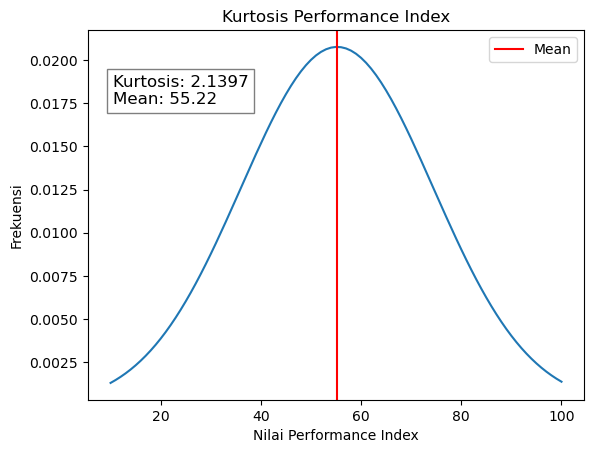

In [24]:
# Mencari mean dari data
mean = sum(data['Performance Index']) / len(data['Performance Index'])

# Hitung jumlah kuadrat selisih antara setiap data dengan rata-rata
squared_diff = [(x - mean) ** 2 for x in (data['Performance Index'])]

# Hitung rata-rata dari kuadrat selisih di atas
variance = sum(squared_diff) / len(data['Performance Index'])

# Hitung standar deviasi dengan mengambil akar kuadrat dari varians
std = variance ** 0.5

# Menghitung nilai kurtosis
sum_fourth_power_deviation = sum((x - mean) ** 4 for x in data['Performance Index'])
n=len(data['Performance Index'])
kurtosis = (1 / n) * (sum_fourth_power_deviation / (std ** 4))

# Visualisasi histogram data sebagai garis
plt.plot(result['x'],result['f(x)'])
plt.axvline(mean, color='red', label='Mean')
plt.text(0.05, 0.8, f'Kurtosis: {kurtosis:.4f}\nMean: {mean:.2f}', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)
plt.xlabel('Nilai Performance Index')
plt.ylabel('Frekuensi')
plt.title('Kurtosis Performance Index') 
plt.legend()

print(f"Nilai rata-rata dari data tersebut adalah: {mean:.4f}")
print(f"Nilai standar deviasi dari data tersebut adalah: {std:.4f}")
print(f"Nilai Kurtosis dari data tersebut adalah: {kurtosis:.4f}")

## c. Nomalisasi data

In [25]:
# Membuat salinan DataFrame 'data' ke variabel 'df'
df = data.copy()

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada seluruh kolom DataFrame
df[:] = scaler.fit_transform(df)

# Menampilkan data setelah dinormalisasi
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1.0,1.0,0.111111,0.900000
1,0.375,0.711864,0.0,0.0,0.222222,0.611111
2,0.875,0.186441,1.0,0.6,0.222222,0.388889
3,0.500,0.203390,1.0,0.2,0.222222,0.288889
4,0.750,0.593220,0.0,0.8,0.555556,0.622222


In [26]:
df.dtypes

Hours Studied                       float64
Previous Scores                     float64
Extracurricular Activities          float64
Sleep Hours                         float64
Sample Question Papers Practiced    float64
Performance Index                   float64
dtype: object

## d. Pengujian hipotesis, analisis korelasi (Multivariate Analysis)

In [41]:
data.corr(method='pearson')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


<AxesSubplot:>

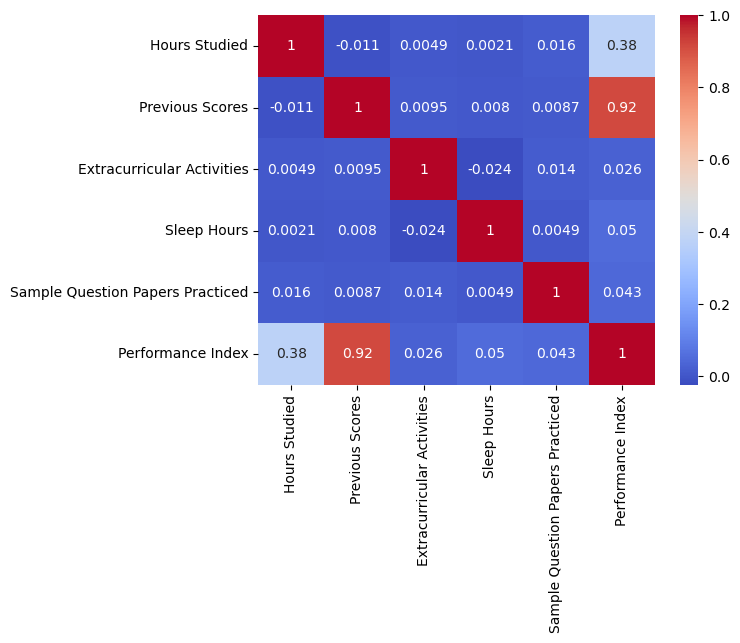

In [27]:
sns.heatmap(data.corr(method='pearson'),cmap='coolwarm',annot=True)  

In [28]:
#Memodelkan dengan Regresi Linier Berganda 
x = data.drop(columns='Performance Index')
y = data['Performance Index'] 
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() 
print_model = model.summary() 
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:58:14   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [29]:
# Melakukan uji F
f_test = model.f_test(np.identity(len(model.params)))

# Mengambil nilai p-value dari hasil uji F
p_value = f_test.pvalue

# Menetapkan tingkat signifikansi
alpha = 0.05

# menampilkan nilai uji F 
print("Hasil Uji F")
print(f_test)

# Membandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("H0 ditolak, terdapat bukti yang cukup untuk menyatakan bahwa setidaknya satu \
variabel independen berpengaruh secara signifikan terhadap variabel dependen dalam model regresi.")
else:
    print("H0 gagal ditolak, tidak terdapat bukti yang cukup untuk menyatakan bahwa setidaknya satu \
variabel independen berpengaruh secara signifikan terhadap variabel dependen dalam model regresi.")

Hasil Uji F
<F test: F=1344347.0695351728, p=0.0, df_denom=9.87e+03, df_num=6>
H0 ditolak, terdapat bukti yang cukup untuk menyatakan bahwa setidaknya satu variabel independen berpengaruh secara signifikan terhadap variabel dependen dalam model regresi.


## e. Pengembangan model dan evaluasi

In [30]:
X = data.drop(columns='Performance Index')
y = data['Performance Index']

# modeling 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 ### Model 1 Linear Regression

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(f"Nilai R2 dari data tersebut adalah : {r2_score(y_test,y_pred):.5f}")
print(f"Nilai Mean Absolute Error dari data tersebut adalah : {mean_absolute_error(y_test,y_pred):.5f}")
print(f"Nilai Mean Squared Error dari data tersebut adalah : {mean_squared_error(y_test,y_pred):.5f}")
print(f"Nilai Root Mean Squared Error dari data tersebut adalah : {np.sqrt(mean_squared_error(y_test,y_pred)):.5f}")

Nilai R2 dari data tersebut adalah : 0.98812
Nilai Mean Absolute Error dari data tersebut adalah : 1.62271
Nilai Mean Squared Error dari data tersebut adalah : 4.20704
Nilai Root Mean Squared Error dari data tersebut adalah : 2.05111


### Model 2 Random Forest

In [32]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(f"Nilai R2 dari data terseb5ut adalah : {r2_score(y_test,y_pred):.5f}")
print(f"Nilai Mean Absolute Error dari data tersebut adalah : {mean_absolute_error(y_test,y_pred):.5f}")
print(f"Nilai Mean Squared Error dari data tersebut adalah : {mean_squared_error(y_test,y_pred):.5f}")
print(f"Nilai Root Mean Squared Error dari data tersebut adalah :{np.sqrt(mean_squared_error(y_test,y_pred)):.5f}")

Nilai R2 dari data terseb5ut adalah : 0.98403
Nilai Mean Absolute Error dari data tersebut adalah : 1.88553
Nilai Mean Squared Error dari data tersebut adalah : 5.65674
Nilai Root Mean Squared Error dari data tersebut adalah :2.37839


### Model 3 Decision Tree

In [33]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(f"Nilai R2 dari data tersebut adalah : {r2_score(y_test,y_pred):.5f}")
print(f"Nilai Mean Absolute Error dari data tersebut adalah : {mean_absolute_error(y_test,y_pred):.5f}")
print(f"Nilai Mean Squared Error dari data tersebut adalah : {mean_squared_error(y_test,y_pred):.5f}")
print(f"Nilai Root Mean Squared Error dari data tersebut adalah : {np.sqrt(mean_squared_error(y_test,y_pred)):.5f}")

Nilai R2 dari data tersebut adalah : 0.97373
Nilai Mean Absolute Error dari data tersebut adalah : 2.43388
Nilai Mean Squared Error dari data tersebut adalah : 9.30656
Nilai Root Mean Squared Error dari data tersebut adalah : 3.05067


### Mean Absolute Percentage Error (MAPE)

In [34]:
# Mengambil data dari DataFrame
x = data.drop(columns='Performance Index')
y = data['Performance Index']

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=7)

# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model pada set pelatihan
model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi menggunakan MAPE
mape = mean_absolute_error(y_test, y_pred) / y_test.mean() * 100
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Percentage Error (MAPE): 2.94%


## f. Visualisasi 

 - Hours Studied

C:\Users\Fitria Nur Rahmadani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


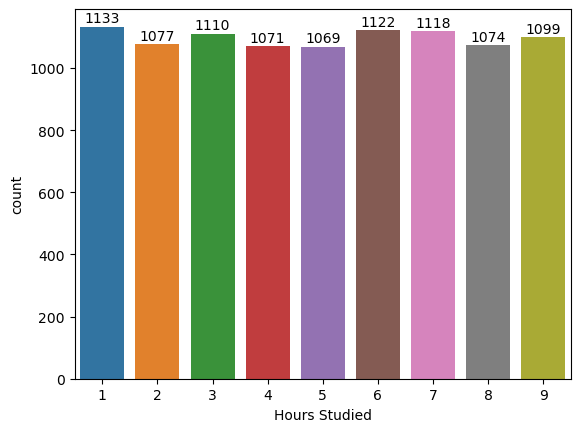

In [35]:
# Membuat countplot dengan seaborn
ax = sns.countplot(data['Hours Studied'])

# Menambahkan nilai tiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

- Previous Scores dan Performance Index

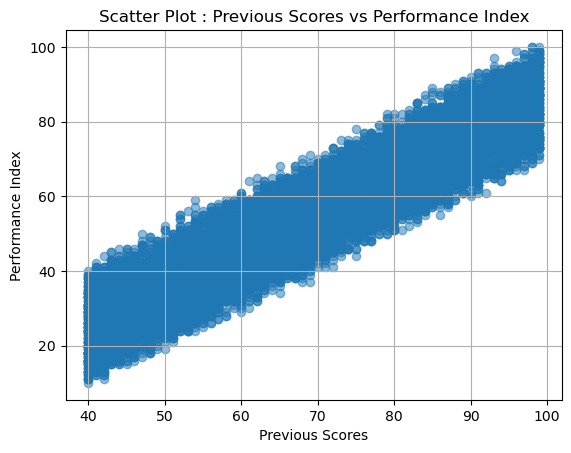

In [36]:
plt.scatter(data["Previous Scores"], data["Performance Index"], alpha=0.5)
plt.title('Scatter Plot : Previous Scores vs Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

- Extracurricular Activities 

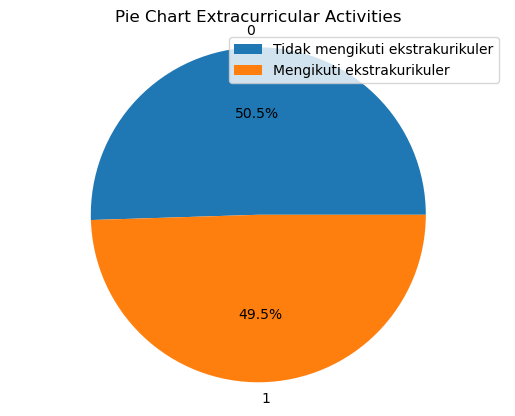

0    4986
1    4887
Name: Extracurricular Activities, dtype: int64


In [37]:
plt.pie(data['Extracurricular Activities'].value_counts(), labels=data['Extracurricular Activities'].value_counts().index, 
        autopct='%1.1f%%')
plt.axis('equal')
custom_labels = ['Tidak mengikuti ekstrakurikuler', 'Mengikuti ekstrakurikuler']
plt.legend(custom_labels)
plt.title('Pie Chart Extracurricular Activities')
plt.show()
print(data['Extracurricular Activities'].value_counts())

- Sleep Hours

C:\Users\Fitria Nur Rahmadani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


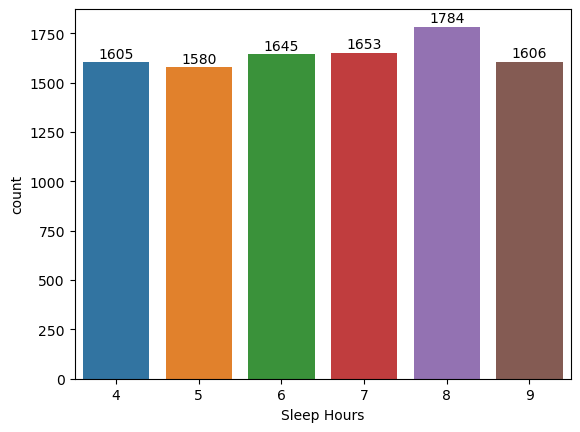

In [38]:
# Membuat countplot dengan seaborn
ax = sns.countplot(data['Sleep Hours'])

# Menambahkan nilai tiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

- Sample Question Papers Practiced

C:\Users\Fitria Nur Rahmadani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


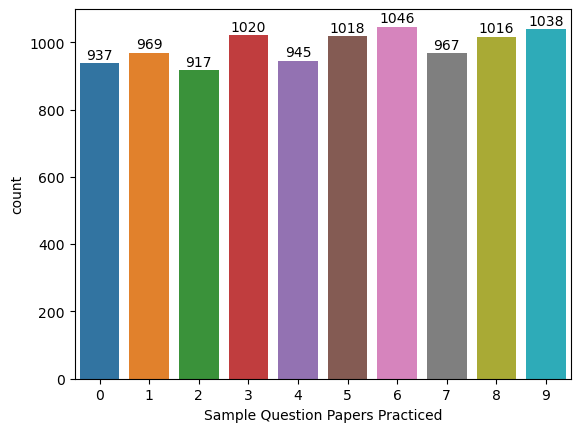

In [39]:
# Membuat countplot dengan seaborn
ax = sns.countplot(data['Sample Question Papers Practiced'])

# Menambahkan nilai tiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')